In [2]:
#---------------------------------------------------- load dataset ----------------------------------------------------
import sklearn
from sklearn import datasets

iris=datasets.load_iris()
#print(iris)
sample_count,feature_count=iris.data.shape

print('sample count is : '+str(sample_count))
print('feature count is : '+str(feature_count) )

X=iris.data
y=iris.target

#print(y)
#print(x.shape)
#print(y.shape)

sample count is : 150
feature count is : 4


In [3]:
#-------------------------------------------------- normalize feature --------------------------------------------------
import numpy as np
from sklearn.preprocessing import normalize
x=normalize(X,axis=1)
d=3
feature_value_range=np.arange(0,1,1/(10**d))
x=x.round(d)
#print(x)
#print(x[:,0])
#print(feature_value_range)
#print(10**d)

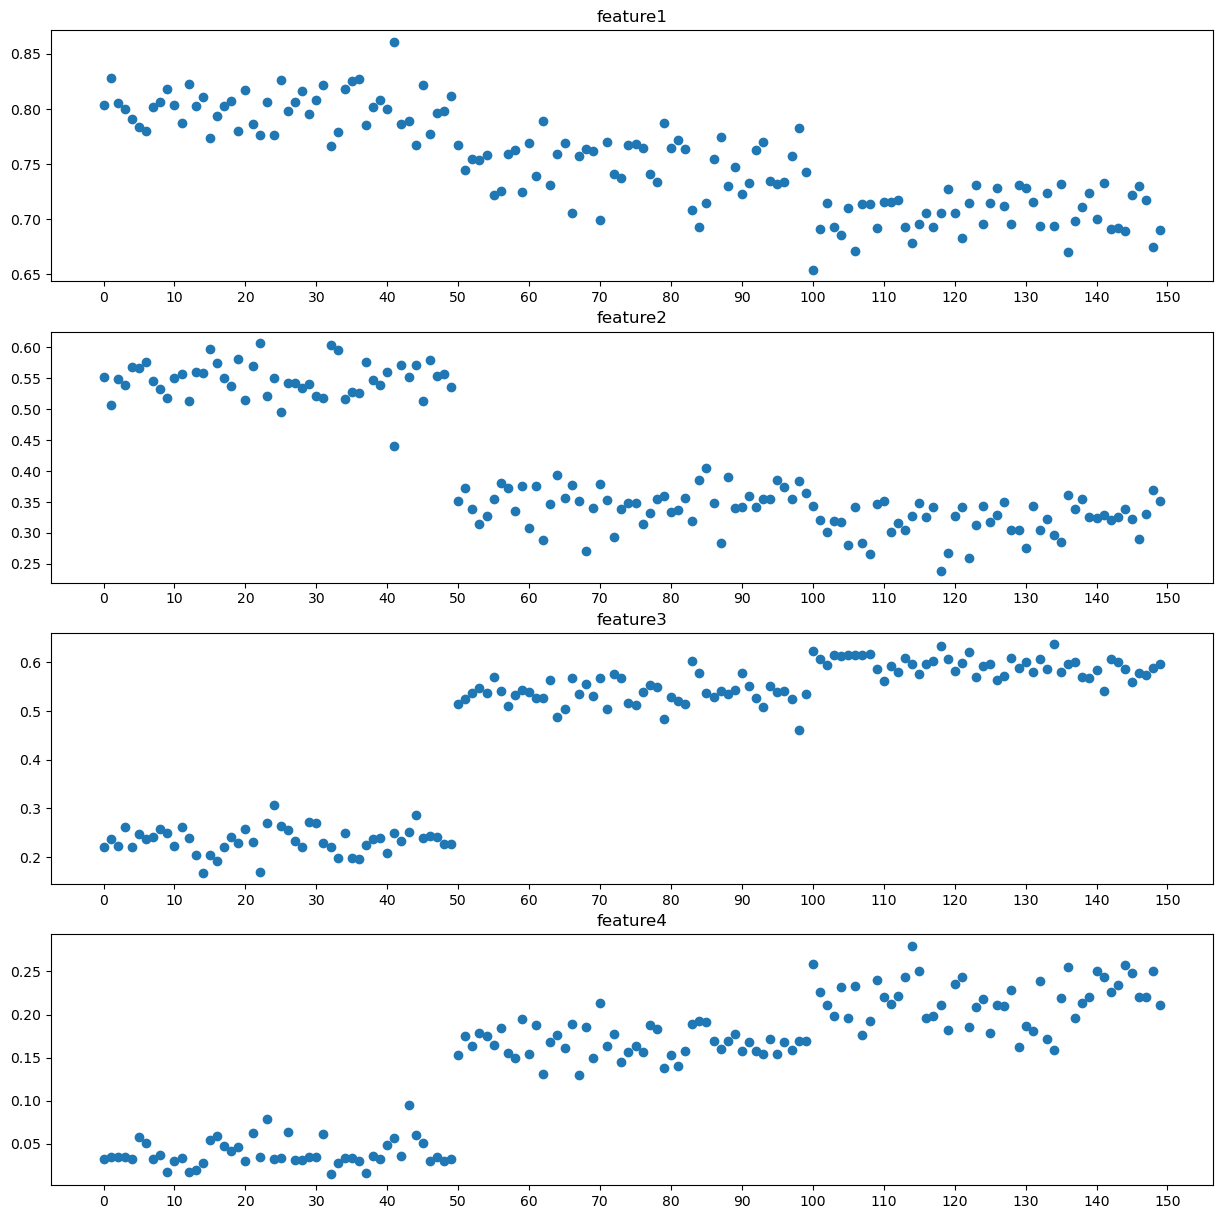

In [4]:
#---------------------------------------------------- show feature -----------------------------------------------------
from matplotlib import pyplot as plt

univers_of_discourse=np.arange(0,sample_count,1)

plt.figure(figsize=(15,15))
for i in range(feature_count):
    subplot=str(feature_count)+'1'+str(i+1)
    plt.subplot(int(subplot))
    plt.scatter(univers_of_discourse,x[:,i])
    plt.title('feature'+str(i+1))
    plt.xticks(np.arange(0,151,10))

(1000, 5, 4)


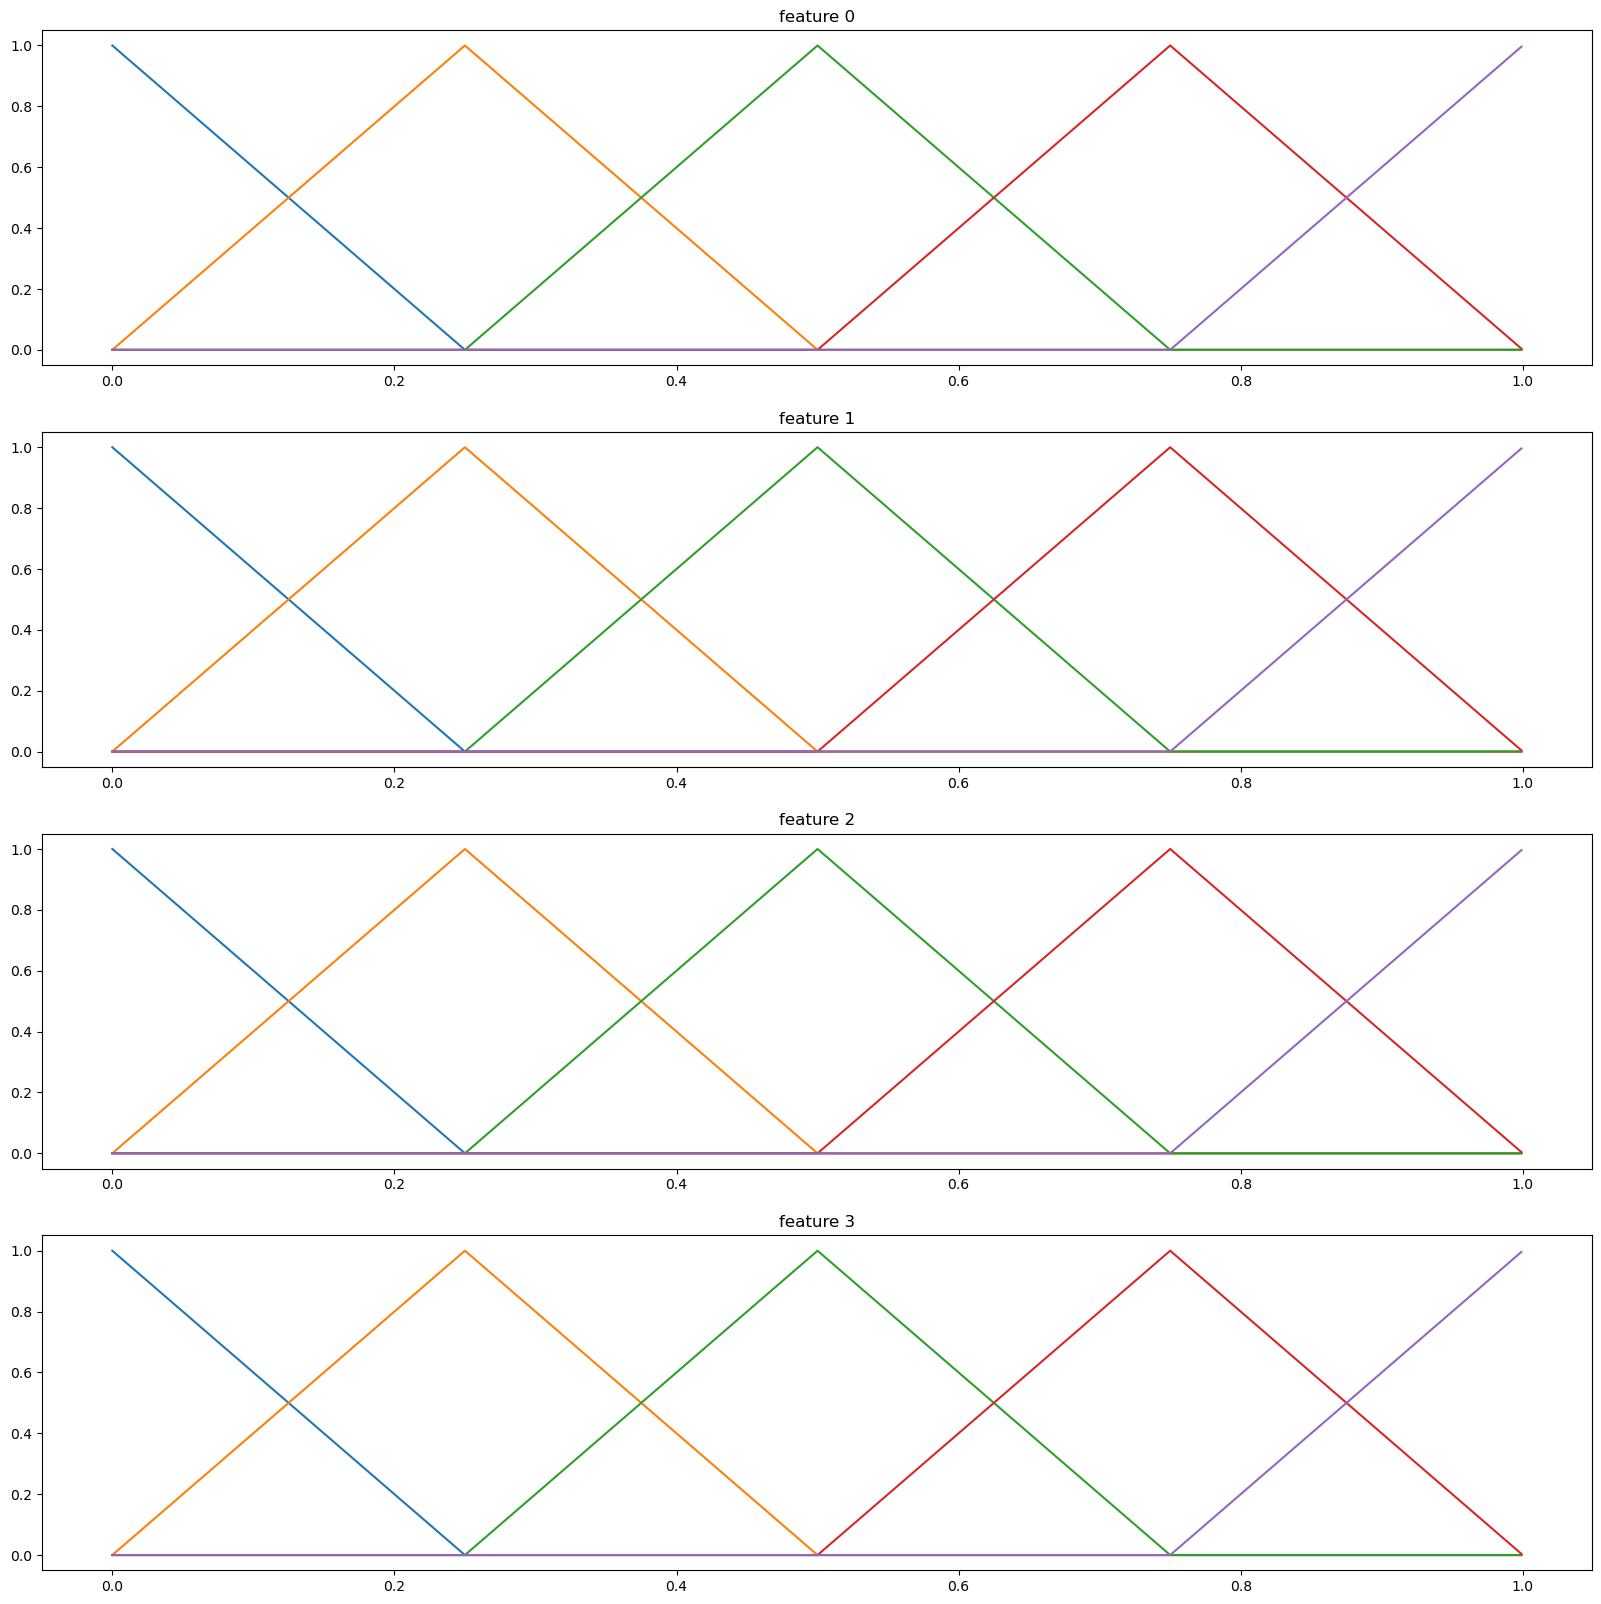

In [6]:
#----------------------------------------------- show linguistic value -----------------------------------------------
import skfuzzy as fuzzy
import matplotlib.pyplot as plt

k=2
lt_count=2*k+1

terms=np.array([[[0.0]*feature_count]*lt_count]*1000)

plt.figure(figsize=(feature_count*5,feature_count*5))
for i in range(feature_count):
    subplot=str(feature_count)+'1'+str(i+1)
    plt.subplot(int(subplot))
    step=((1)/(lt_count-1))
    f=0
    m=0
    l=step
    for j in range(lt_count):       
        #print(l)
        terms[:,j,i]=fuzzy.trimf(feature_value_range,(f,m,l))
        f=m
        m=l
        l=l+step
        plt.plot(feature_value_range,terms[:,j,i])
        title='feature '+str(i)
        plt.title(title)

print(terms.shape)

In [7]:
rulls_matrix=np.array([[[[[0.0]*2]*lt_count]*lt_count]*lt_count]*lt_count)
def fuzzy_clustring_train(X_T,Y_T):
    
    #print(rulls_matrix.shape)

    for i in range(lt_count): # for feature 0
        for j in range(lt_count): # for feature 1
            for k in range(lt_count): # for feature 2
                for l in range(lt_count): # for feature 3                
                    rule_number= (i*125) + (j*25) + (k*5) + (l*1)
                    samples_fire_rule=np.array([[-1.0]*(feature_count+2)]*x_trian[:,0].size) #75*6 print(samples_fire_rule.shape)                 
                    sum_sample=-1 ; sum_mu_calss0 = 0 ; sum_mu_calss1 = 0 ; sum_mu_calss2 = 0 ; sum_mu_all_class = 0                                  
                    for c in range(X_T[:,0].size):                        
                        s=X_T[c,:] #print(s)                    
                        f0_index=int(s[0]*1000);f1_index=int(s[1]*1000);f2_index=int(s[2]*1000);f3_index=int(s[3]*1000)                    
                        #print(f0_v) #print(f1_v)#print(f2_v)#print(f3_v)#print(terms[f0_v,i,0])#print(terms[f1_v,j,1])#print(terms[f2_v,k,2])#print(terms[f3_v,l,3])
                        if  terms[f0_index,i,0] != 0 : 
                            if terms[f1_index,j,1] != 0 : 
                                if terms[f2_index,k,2] != 0 : 
                                    if terms[f3_index,l,3] != 0 :
                                        # sample is in covering area
                                        sum_sample = sum_sample +1
                                        samples_fire_rule[sum_sample,0]=terms[f0_index,i,0] #row 0 : mu of feature 0
                                        samples_fire_rule[sum_sample,1]=terms[f1_index,j,1] #row 1 : mu of feature 1
                                        samples_fire_rule[sum_sample,2]=terms[f2_index,k,2] #row 2 : mu of feature 2
                                        samples_fire_rule[sum_sample,3]=terms[f3_index,l,3] #row 3 : mu of feature 3
                                        samples_fire_rule[sum_sample,4]=Y_T[c]          #row 4 : calss (target id)
                                                                                            #row 5 : degree (sazegari)
                                        samples_fire_rule[sum_sample,5]= terms[f0_index,i,0] * terms[f1_index,j,1] * terms[f2_index,k,2] *terms[f3_index,l,3]
                                        #print(int(samples_fire_rule[sum_sample,4]))
                    #print(str(rule_number)+' : '+str(sum_sample))                
                    for w in range(sum_sample):
                        if int(samples_fire_rule[w,4])==0 : sum_mu_calss0 = sum_mu_calss0 + samples_fire_rule[w,5]
                        if int(samples_fire_rule[w,4])==1 : sum_mu_calss1 = sum_mu_calss1 + samples_fire_rule[w,5]
                        if int(samples_fire_rule[w,4])==2 : sum_mu_calss2 = sum_mu_calss2 + samples_fire_rule[w,5]
                    sum_mu_all_class=sum_mu_calss0 + sum_mu_calss1 + sum_mu_calss2
                    #print(str(rule_number)+' : '+str(sum_sample)+' : '+str(sum_mu_all_class))
                    
                    if sum_mu_all_class !=0 : # samples is in this rule
                        confidenc_class_0 = (sum_mu_calss0 / sum_mu_all_class)
                        confidenc_class_1 = (sum_mu_calss1 / sum_mu_all_class)
                        confidenc_class_2 = (sum_mu_calss2 / sum_mu_all_class)
                        support_class_0 = (sum_mu_calss0 / X_T[:,0].size)
                        support_class_1 = (sum_mu_calss1 / X_T[:,0].size)
                        support_class_2 = (sum_mu_calss2 / X_T[:,0].size)
                        weigth_class_0 = confidenc_class_0 * support_class_0 ; weigth_class_0=round(weigth_class_0,3)
                        weigth_class_1 = confidenc_class_1 * support_class_1 ; weigth_class_1=round(weigth_class_1,3)
                        weigth_class_2 = confidenc_class_2 * support_class_2 ; weigth_class_0=round(weigth_class_2,3)

                        if   weigth_class_0 > weigth_class_1 and weigth_class_0 > weigth_class_2 : 
                            rulls_matrix[i,j,k,l,0]=0.0
                            rulls_matrix[i,j,k,l,1]=weigth_class_0
                        elif weigth_class_1 > weigth_class_0 and weigth_class_1 > weigth_class_2 : 
                            rulls_matrix[i,j,k,l,0]=1.0
                            rulls_matrix[i,j,k,l,1]=weigth_class_1
                        else : 
                            rulls_matrix[i,j,k,l,0]=2.0 
                            rulls_matrix[i,j,k,l,1]=weigth_class_2
                        
                        # **** print(rule_number,i,j,k,l,rulls_matrix[i,j,k,l,:])

    #print(rulls_matrix)

In [17]:
def fuzzy_clustring_test_single_winner(X_T,Y_T):
    count_correct=0
    count_fail=0

    #print(x_test.shape)
    for c in range(X_T[:,0].size):
        ca=-1
        w_rull=-1
        s=X_T[c,:]
        #print (s)
        f0_index=int(s[0]*1000)
        f1_index=int(s[1]*1000)
        f2_index=int(s[2]*1000)
        f3_index=int(s[3]*1000)
        goal=Y_T[c]
        for i in range(lt_count): # for feature 0
            for j in range(lt_count): # for feature 1
                for k in range(lt_count): # for feature 2
                    for l in range(lt_count): # for feature 3                
                        if terms[f0_index,i,0] != 0 and terms[f1_index,j,1] != 0 and terms[f2_index,k,2] != 0 and terms[f3_index,k,3] != 0 :                        
                            w_current = rulls_matrix[i,j,k,l,1]
                            if w_current > w_rull:
                                ca = rulls_matrix[i,j,k,l,0]

        # **** print(c ,s,goal,int(ca),goal==int(ca))
        if ca==goal:
            count_correct += 1
        else:
             count_fail += 1
    return count_correct,count_fail
    print('correct is : ', coun_correct)   
    print('fail is : ', count_fail)

In [18]:
def fuzzy_clustring_test_weighted_voting(X_T,Y_T):
    count_correct=0
    count_fail=0

    #print(x_test.shape)
    for c in range(X_T[:,0].size):
        ca=-1
        w0_rull= 0 
        w1_rull= 0
        w2_rull= 0
        s=X_T[c,:]
        #print (s)
        f0_index=int(s[0]*1000)
        f1_index=int(s[1]*1000)
        f2_index=int(s[2]*1000)
        f3_index=int(s[3]*1000)
        goal=Y_T[c]
        for i in range(lt_count): # for feature 0
            for j in range(lt_count): # for feature 1
                for k in range(lt_count): # for feature 2
                    for l in range(lt_count): # for feature 3                
                        if terms[f0_index,i,0] != 0 and terms[f1_index,j,1] != 0 and terms[f2_index,k,2] != 0 and terms[f3_index,k,3] != 0 :                        
                            ca=rulls_matrix[i,j,k,l,0]
                            if ca==0 : w0_rull+=rulls_matrix[i,j,k,l,1]
                            if ca==1 : w1_rull+=rulls_matrix[i,j,k,l,1]
                            if ca==2 : w2_rull+=rulls_matrix[i,j,k,l,1]
        if w0_rull > w1_rull and w0_rull > w1_rull : ca=0
        elif w1_rull > w0_rull and w1_rull > w2_rull : ca=1
        else : ca=2
        # **** print(c ,s,goal,int(ca),goal==int(ca))        
        if ca==goal:
            count_correct += 1
        else:
             count_fail += 1
    #print('correct is : ', coun_correct)   
    #print('fail is : ', count_fail)
    
    return count_correct,count_fail

In [19]:
from sklearn.model_selection import train_test_split
x_trian,x_test,y_train,y_test =train_test_split(x,y,test_size=0.5,shuffle=True)

#print(x_trian.shape)
#print(y_train.shape)


fuzzy_clustring_train(x_trian,y_train)
co1,fa1=fuzzy_clustring_test_single_winner(x_test,y_test)
print('correct is : ',co1)
print('fail is : ',fa1)

fuzzy_clustring_train(x_test,y_test)
co2,fa2=fuzzy_clustring_test_single_winner(x_trian,y_train)
print('correct is : ',co2)
print('fail is : ',fa2)

print('accuracy is : ',(co1+co2)/2)

correct is :  24
fail is :  51
correct is :  26
fail is :  49
accuracy is :  25.0


In [20]:
#from sklearn.model_selection import train_test_split
#x_trian,x_test,y_train,y_test =train_test_split(x,y,test_size=0.5,shuffle=True)

#print(x_trian.shape)
#print(y_train.shape)

fuzzy_clustring_train(x_trian,y_train)
co1,fa1=fuzzy_clustring_test_weighted_voting(x_test,y_test)
print('correct is : ',co1)
print('fail is : ',fa1)

fuzzy_clustring_train(x_test,y_test)
co2,fa2=fuzzy_clustring_test_weighted_voting(x_trian,y_train)
print('correct is : ',co2)
print('fail is : ',fa2)

print('accuracy is : ',(co1+co2)/2)


correct is :  26
fail is :  49
correct is :  20
fail is :  55
accuracy is :  23.0
